# Age Visualizations

In [108]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText

# Importing data
url = 'https://raw.githubusercontent.com/jnshzk/capstone/main/data/data.csv?token=GHSAT0AAAAAABZKYASC3LAOXTIGM6SYKSEMY4CWSBQ'
data = pd.read_csv(url)

## [Average Age per Election Type and Election Date] - All Cities (RCV and Non-RCV)

In [109]:
# filtering the columns that we'll use in this section
df = data[['Residence_Addresses_City', 'elec_date', 'elec_year', 'elec_type', 'mean_age', 'voted_voters', 'state']]
df['elec_type'] = df['elec_type'].replace('Consolidated_General', 'Consolidated General')
df['elec_type'] = df['elec_type'].replace('Local_or_Municipal', 'Local or Municipal')
df['elec_date'] = df['elec_date'].replace('_', '-', regex=True)

/var/folders/0p/jxmy09910dvd37j3qv0_1df80000gn/T/ipykernel_7081/1778369911.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['elec_type'] = df['elec_type'].replace('Consolidated_General', 'Consolidated General')
/var/folders/0p/jxmy09910dvd37j3qv0_1df80000gn/T/ipykernel_7081/1778369911.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['elec_type'] = df['elec_type'].replace('Local_or_Municipal', 'Local or Municipal')
/var/folders/0p/jxmy09910dvd37j3qv0_1df80000gn/T/ipykernel_7081/1778369911.py:5: S

In [110]:
# Calculating the weighted average age per election date and election type
df['age_x_voters'] = df['mean_age'] * df['voted_voters']
df = df.groupby(['elec_date', 'elec_type', 'state']).agg({'voted_voters':'sum', 'age_x_voters':'sum'}).reset_index()
df['mean_age'] = df['age_x_voters'] / df['voted_voters']
df = df.round({'mean_age': 2})

# Calculating the weighted average age per election type
df_all_elec = df.groupby(['elec_type', 'state']).agg({'voted_voters': sum, 'age_x_voters': sum}).reset_index()
df_all_elec['mean_age'] = df_all_elec['age_x_voters'] / df_all_elec['voted_voters']
del df_all_elec['age_x_voters']
df_all_elec = df_all_elec.round({'mean_age': 2})

/var/folders/0p/jxmy09910dvd37j3qv0_1df80000gn/T/ipykernel_7081/2663646896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_x_voters'] = df['mean_age'] * df['voted_voters']


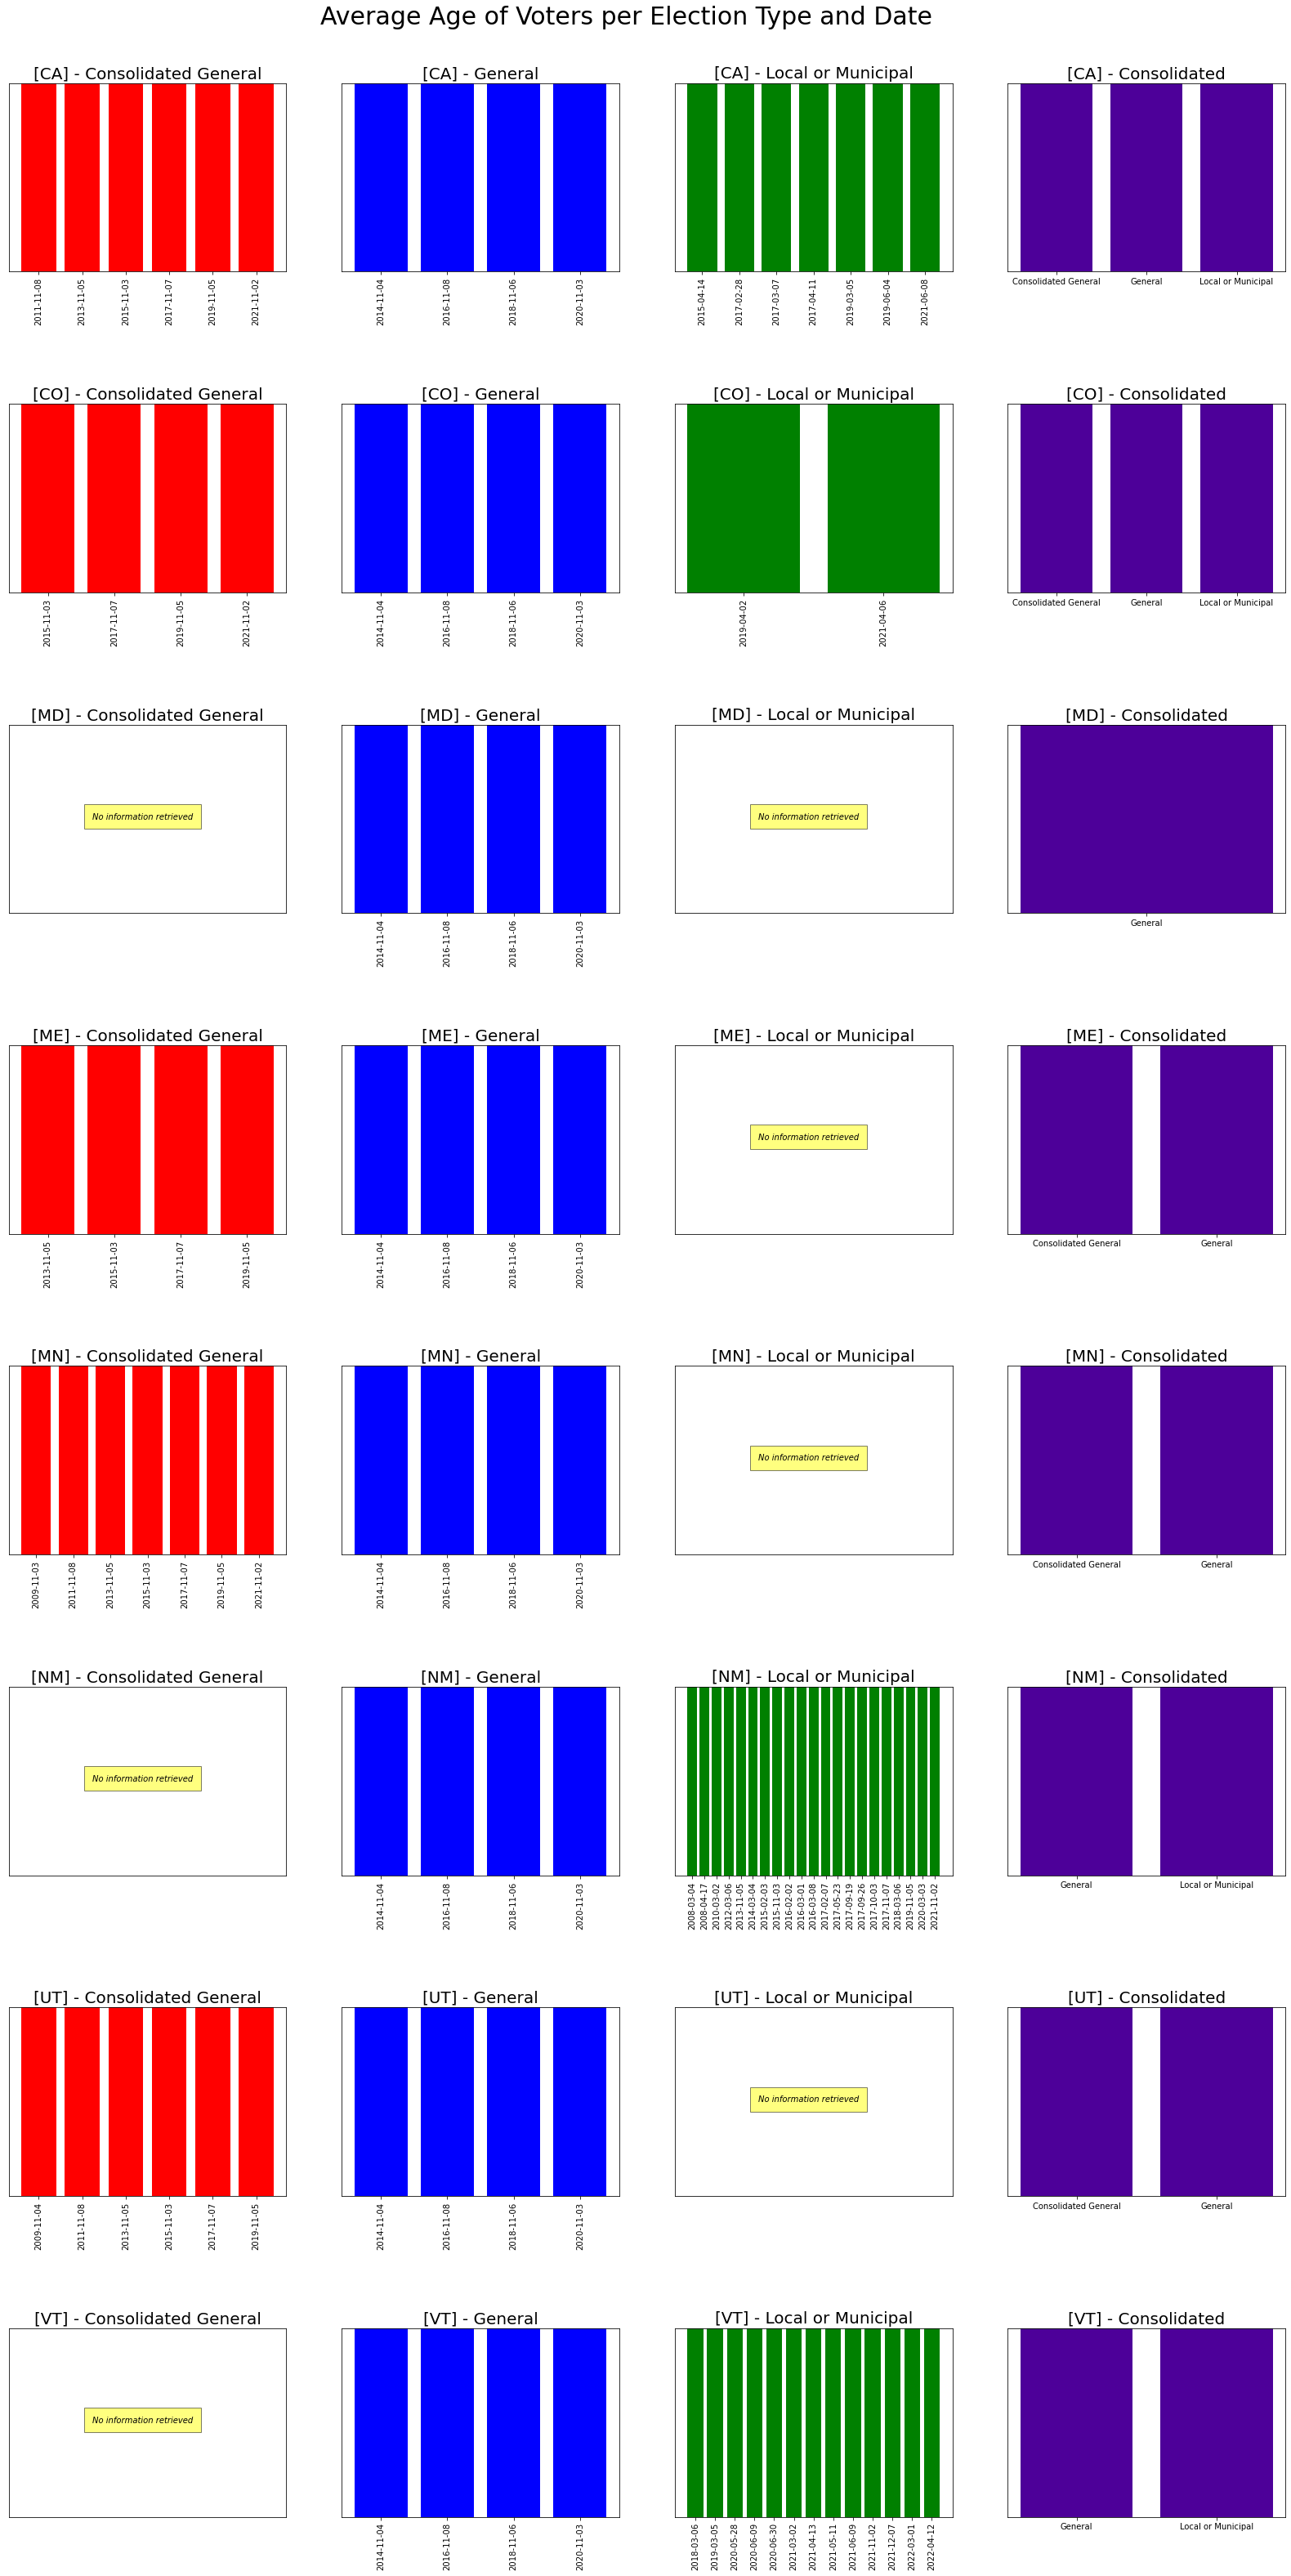

In [111]:
# ploting Graph 1. Average Age of Voters per Election Type and Date
fig, axes = plt.subplots(nrows = 8, ncols = 4, figsize = (28,44), sharey = True)

# CALIFORNIA (CA)
#axes[0,0] - California: Consolidated General per election
axes[0,0].bar(df[(df['state'] == 'CA') & (df['elec_type'] == 'Consolidated General')]['elec_date'], 
            df[(df['state'] == 'CA') & (df['elec_type'] == 'Consolidated General')]['mean_age'],
           color='red')
axes[0,0].set_title('[CA] - Consolidated General', fontsize=20)
axes[0,0].set_xticks(df[(df['state'] == 'CA') & (df['elec_type'] == 'Consolidated General')]['elec_date'],
                   df[(df['state'] == 'CA') & (df['elec_type'] == 'Consolidated General')]['elec_date'], 
                   rotation='vertical')
axes[0,0].set_ylim([30,70])
axes[0,0].set_yticks(np.arange(30, 75, 5))

#axes[0,1] - California: General per election
axes[0,1].bar(df[(df['state'] == 'CA') & (df['elec_type'] == 'General')]['elec_date'], 
            df[(df['state'] == 'CA') & (df['elec_type'] == 'General')]['mean_age'],
            color='blue')
axes[0,1].set_title('[CA] - General', fontsize=20)
axes[0,1].set_xticks(df[(df['state'] == 'CA') & (df['elec_type'] == 'General')]['elec_date'],
                   df[(df['state'] == 'CA') & (df['elec_type'] == 'General')]['elec_date'], 
                   rotation='vertical')

#axes[0,2] - California: Local or Municipal per election
axes[0,2].bar(df[(df['state'] == 'CA') & (df['elec_type'] == 'Local or Municipal')]['elec_date'], 
            df[(df['state'] == 'CA') & (df['elec_type'] == 'Local or Municipal')]['mean_age'],
           color='green')
axes[0,2].set_title('[CA] - Local or Municipal', fontsize=20)
axes[0,2].set_xticks(df[(df['state'] == 'CA') & (df['elec_type'] == 'Local or Municipal')]['elec_date'],
                   df[(df['state'] == 'CA') & (df['elec_type'] == 'Local or Municipal')]['elec_date'], 
                   rotation='vertical')

#axes[0,3] - California: All types of election
axes[0,3].bar(df_all_elec[(df_all_elec['state'] == 'CA')]['elec_type'], 
            df_all_elec[(df_all_elec['state'] == 'CA')]['mean_age'],
             color=[0.3, 0, 0.6])
axes[0,3].set_title('[CA] - Consolidated', fontsize=20)
axes[0,3].set_xticks(df_all_elec[(df_all_elec['state'] == 'CA')]['elec_type'], 
                   df_all_elec[(df_all_elec['state'] == 'CA')]['elec_type'], 
                   rotation='horizontal')

# COLORADO(CO)
#axes[1,0] - Colorado: Consolidated General per election
axes[1,0].bar(df[(df['state'] == 'CO') & (df['elec_type'] == 'Consolidated General')]['elec_date'], 
            df[(df['state'] == 'CO') & (df['elec_type'] == 'Consolidated General')]['mean_age'],
           color='red')
axes[1,0].set_title('[CO] - Consolidated General', fontsize=20)
axes[1,0].set_xticks(df[(df['state'] == 'CO') & (df['elec_type'] == 'Consolidated General')]['elec_date'],
                   df[(df['state'] == 'CO') & (df['elec_type'] == 'Consolidated General')]['elec_date'], 
                   rotation='vertical')
axes[1,0].set_ylim([30,70])
axes[1,0].set_yticks(np.arange(30, 75, 5))

#axes[1,1] - Colorado: General per election
axes[1,1].bar(df[(df['state'] == 'CO') & (df['elec_type'] == 'General')]['elec_date'], 
            df[(df['state'] == 'CO') & (df['elec_type'] == 'General')]['mean_age'],
            color='blue')
axes[1,1].set_title('[CO] - General', fontsize=20)
axes[1,1].set_xticks(df[(df['state'] == 'CO') & (df['elec_type'] == 'General')]['elec_date'],
                   df[(df['state'] == 'CO') & (df['elec_type'] == 'General')]['elec_date'], 
                   rotation='vertical')

#axes[1,2] - Colorado: Local or Municipal per election
axes[1,2].bar(df[(df['state'] == 'CO') & (df['elec_type'] == 'Local or Municipal')]['elec_date'], 
            df[(df['state'] == 'CO') & (df['elec_type'] == 'Local or Municipal')]['mean_age'],
           color='green')
axes[1,2].set_title('[CO] - Local or Municipal', fontsize=20)
axes[1,2].set_xticks(df[(df['state'] == 'CO') & (df['elec_type'] == 'Local or Municipal')]['elec_date'],
                   df[(df['state'] == 'CO') & (df['elec_type'] == 'Local or Municipal')]['elec_date'], 
                   rotation='vertical')

#axes[1,3] - Colorado: All types of election
axes[1,3].bar(df_all_elec[(df_all_elec['state'] == 'CO')]['elec_type'], 
            df_all_elec[(df_all_elec['state'] == 'CO')]['mean_age'],
             color=[0.3, 0, 0.6])
axes[1,3].set_title('[CO] - Consolidated', fontsize=20)
axes[1,3].set_xticks(df_all_elec[(df_all_elec['state'] == 'CO')]['elec_type'], 
                   df_all_elec[(df_all_elec['state'] == 'CO')]['elec_type'], 
                   rotation='horizontal')

# MARYLAND (MD)
#axes[2,0] - Maryland: Consolidated General per election
axes[2,0].bar(df[(df['state'] == 'MD') & (df['elec_type'] == 'Consolidated General')]['elec_date'], 
            df[(df['state'] == 'MD') & (df['elec_type'] == 'Consolidated General')]['mean_age'],
           color='red')
axes[2,0].set_title('[MD] - Consolidated General', fontsize=20)
axes[2,0].set_xticks(df[(df['state'] == 'MD') & (df['elec_type'] == 'Consolidated General')]['elec_date'],
                   df[(df['state'] == 'MD') & (df['elec_type'] == 'Consolidated General')]['elec_date'], 
                   rotation='vertical')
axes[2,0].set_ylim([30,70])
axes[2,0].set_yticks(np.arange(30, 75, 5))
axes[2,0].axis([0, 10, 0, 10])
axes[2,0].text(3, 5, 'No information retrieved', style='italic', bbox={'facecolor': 'yellow', 'alpha': 0.5, 'pad': 10})

#axes[2,1] - Maryland: General per election
axes[2,1].bar(df[(df['state'] == 'MD') & (df['elec_type'] == 'General')]['elec_date'], 
            df[(df['state'] == 'MD') & (df['elec_type'] == 'General')]['mean_age'],
            color='blue')
axes[2,1].set_title('[MD] - General', fontsize=20)
axes[2,1].set_xticks(df[(df['state'] == 'MD') & (df['elec_type'] == 'General')]['elec_date'],
                   df[(df['state'] == 'MD') & (df['elec_type'] == 'General')]['elec_date'], 
                   rotation='vertical')

#axes[2,2] - Maryland: Local or Municipal per election
axes[2,2].bar(df[(df['state'] == 'MD') & (df['elec_type'] == 'Local or Municipal')]['elec_date'], 
            df[(df['state'] == 'MD') & (df['elec_type'] == 'Local or Municipal')]['mean_age'],
           color='green')
axes[2,2].set_title('[MD] - Local or Municipal', fontsize=20)
axes[2,2].set_xticks(df[(df['state'] == 'MD') & (df['elec_type'] == 'Local or Municipal')]['elec_date'],
                   df[(df['state'] == 'MD') & (df['elec_type'] == 'Local or Municipal')]['elec_date'], 
                   rotation='vertical')
axes[2,2].axis([0, 10, 0, 10])
axes[2,2].text(3, 5, 'No information retrieved', style='italic', bbox={'facecolor': 'yellow', 'alpha': 0.5, 'pad': 10})


#axes[2,3] - Maryland: All types of election
axes[2,3].bar(df_all_elec[(df_all_elec['state'] == 'MD')]['elec_type'], 
            df_all_elec[(df_all_elec['state'] == 'MD')]['mean_age'],
             color=[0.3, 0, 0.6])
axes[2,3].set_title('[MD] - Consolidated', fontsize=20)
axes[2,3].set_xticks(df_all_elec[(df_all_elec['state'] == 'MD')]['elec_type'], 
                   df_all_elec[(df_all_elec['state'] == 'MD')]['elec_type'], 
                   rotation='horizontal')

# MAINE (ME)
#axes[3,0] - Maine: Consolidated General per election
axes[3,0].bar(df[(df['state'] == 'ME') & (df['elec_type'] == 'Consolidated General')]['elec_date'], 
            df[(df['state'] == 'ME') & (df['elec_type'] == 'Consolidated General')]['mean_age'],
           color='red')
axes[3,0].set_title('[ME] - Consolidated General', fontsize=20)
axes[3,0].set_xticks(df[(df['state'] == 'ME') & (df['elec_type'] == 'Consolidated General')]['elec_date'],
                   df[(df['state'] == 'ME') & (df['elec_type'] == 'Consolidated General')]['elec_date'], 
                   rotation='vertical')
axes[3,0].set_ylim([30,70])
axes[3,0].set_yticks(np.arange(30, 75, 5))

#axes[3,1] - Maine: General per election
axes[3,1].bar(df[(df['state'] == 'ME') & (df['elec_type'] == 'General')]['elec_date'], 
            df[(df['state'] == 'ME') & (df['elec_type'] == 'General')]['mean_age'],
            color='blue')
axes[3,1].set_title('[ME] - General', fontsize=20)
axes[3,1].set_xticks(df[(df['state'] == 'ME') & (df['elec_type'] == 'General')]['elec_date'],
                   df[(df['state'] == 'ME') & (df['elec_type'] == 'General')]['elec_date'], 
                   rotation='vertical')

#axes[3,2] - Maine: Local or Municipal per election
axes[3,2].bar(df[(df['state'] == 'ME') & (df['elec_type'] == 'Local or Municipal')]['elec_date'], 
            df[(df['state'] == 'ME') & (df['elec_type'] == 'Local or Municipal')]['mean_age'],
           color='green')
axes[3,2].set_title('[ME] - Local or Municipal', fontsize=20)
axes[3,2].set_xticks(df[(df['state'] == 'ME') & (df['elec_type'] == 'Local or Municipal')]['elec_date'],
                   df[(df['state'] == 'ME') & (df['elec_type'] == 'Local or Municipal')]['elec_date'], 
                   rotation='vertical')
axes[3,2].axis([0, 10, 0, 10])
axes[3,2].text(3, 5, 'No information retrieved', style='italic', bbox={'facecolor': 'yellow', 'alpha': 0.5, 'pad': 10})


#axes[3,3] - Maine: All types of election
axes[3,3].bar(df_all_elec[(df_all_elec['state'] == 'ME')]['elec_type'], 
            df_all_elec[(df_all_elec['state'] == 'ME')]['mean_age'],
             color=[0.3, 0, 0.6])
axes[3,3].set_title('[ME] - Consolidated', fontsize=20)
axes[3,3].set_xticks(df_all_elec[(df_all_elec['state'] == 'ME')]['elec_type'], 
                   df_all_elec[(df_all_elec['state'] == 'ME')]['elec_type'], 
                   rotation='horizontal')

# MINNESOTA (MN)
#axes[4,0] - Minnesota: Consolidated General per election
axes[4,0].bar(df[(df['state'] == 'MN') & (df['elec_type'] == 'Consolidated General')]['elec_date'], 
            df[(df['state'] == 'MN') & (df['elec_type'] == 'Consolidated General')]['mean_age'],
           color='red')
axes[4,0].set_title('[MN] - Consolidated General', fontsize=20)
axes[4,0].set_xticks(df[(df['state'] == 'MN') & (df['elec_type'] == 'Consolidated General')]['elec_date'],
                   df[(df['state'] == 'MN') & (df['elec_type'] == 'Consolidated General')]['elec_date'], 
                   rotation='vertical')
axes[4,0].set_ylim([30,70])
axes[4,0].set_yticks(np.arange(30, 75, 5))

#axes[4,1] - Minnesota: General per election
axes[4,1].bar(df[(df['state'] == 'MN') & (df['elec_type'] == 'General')]['elec_date'], 
            df[(df['state'] == 'MN') & (df['elec_type'] == 'General')]['mean_age'],
            color='blue')
axes[4,1].set_title('[MN] - General', fontsize=20)
axes[4,1].set_xticks(df[(df['state'] == 'MN') & (df['elec_type'] == 'General')]['elec_date'],
                   df[(df['state'] == 'MN') & (df['elec_type'] == 'General')]['elec_date'], 
                   rotation='vertical')

#axes[4,2] - Minnesota: Local or Municipal per election
axes[4,2].bar(df[(df['state'] == 'MN') & (df['elec_type'] == 'Local or Municipal')]['elec_date'], 
            df[(df['state'] == 'MN') & (df['elec_type'] == 'Local or Municipal')]['mean_age'],
           color='green')
axes[4,2].set_title('[MN] - Local or Municipal', fontsize=20)
axes[4,2].set_xticks(df[(df['state'] == 'MN') & (df['elec_type'] == 'Local or Municipal')]['elec_date'],
                   df[(df['state'] == 'MN') & (df['elec_type'] == 'Local or Municipal')]['elec_date'], 
                   rotation='vertical')
axes[4,2].axis([0, 10, 0, 10])
axes[4,2].text(3, 5, 'No information retrieved', style='italic', bbox={'facecolor': 'yellow', 'alpha': 0.5, 'pad': 10})


#axes[4,3] - Minnesota: All types of election
axes[4,3].bar(df_all_elec[(df_all_elec['state'] == 'MN')]['elec_type'], 
            df_all_elec[(df_all_elec['state'] == 'MN')]['mean_age'],
             color=[0.3, 0, 0.6])
axes[4,3].set_title('[MN] - Consolidated', fontsize=20)
axes[4,3].set_xticks(df_all_elec[(df_all_elec['state'] == 'MN')]['elec_type'], 
                   df_all_elec[(df_all_elec['state'] == 'MN')]['elec_type'], 
                   rotation='horizontal')

# NEW MEXICO (NM)
#axes[5,0] - New Mexico: Consolidated General per election
axes[5,0].bar(df[(df['state'] == 'NM') & (df['elec_type'] == 'Consolidated General')]['elec_date'], 
            df[(df['state'] == 'NM') & (df['elec_type'] == 'Consolidated General')]['mean_age'],
           color='red')
axes[5,0].set_title('[NM] - Consolidated General', fontsize=20)
axes[5,0].set_xticks(df[(df['state'] == 'NM') & (df['elec_type'] == 'Consolidated General')]['elec_date'],
                   df[(df['state'] == 'NM') & (df['elec_type'] == 'Consolidated General')]['elec_date'], 
                   rotation='vertical')
axes[5,0].set_ylim([30,70])
axes[5,0].set_yticks(np.arange(30, 75, 5))
axes[5,0].axis([0, 10, 0, 10])
axes[5,0].text(3, 5, 'No information retrieved', style='italic', bbox={'facecolor': 'yellow', 'alpha': 0.5, 'pad': 10})


#axes[5,1] - New Mexico: General per election
axes[5,1].bar(df[(df['state'] == 'NM') & (df['elec_type'] == 'General')]['elec_date'], 
            df[(df['state'] == 'NM') & (df['elec_type'] == 'General')]['mean_age'],
            color='blue')
axes[5,1].set_title('[NM] - General', fontsize=20)
axes[5,1].set_xticks(df[(df['state'] == 'NM') & (df['elec_type'] == 'General')]['elec_date'],
                   df[(df['state'] == 'NM') & (df['elec_type'] == 'General')]['elec_date'], 
                   rotation='vertical')

#axes[5,2] - New Mexico: Local or Municipal per election
axes[5,2].bar(df[(df['state'] == 'NM') & (df['elec_type'] == 'Local or Municipal')]['elec_date'], 
            df[(df['state'] == 'NM') & (df['elec_type'] == 'Local or Municipal')]['mean_age'],
           color='green')
axes[5,2].set_title('[NM] - Local or Municipal', fontsize=20)
axes[5,2].set_xticks(df[(df['state'] == 'NM') & (df['elec_type'] == 'Local or Municipal')]['elec_date'],
                   df[(df['state'] == 'NM') & (df['elec_type'] == 'Local or Municipal')]['elec_date'], 
                   rotation='vertical')

#axes[5,3] - New Mexico: All types of election
axes[5,3].bar(df_all_elec[(df_all_elec['state'] == 'NM')]['elec_type'], 
            df_all_elec[(df_all_elec['state'] == 'NM')]['mean_age'],
             color=[0.3, 0, 0.6])
axes[5,3].set_title('[NM] - Consolidated', fontsize=20)
axes[5,3].set_xticks(df_all_elec[(df_all_elec['state'] == 'NM')]['elec_type'], 
                   df_all_elec[(df_all_elec['state'] == 'NM')]['elec_type'], 
                   rotation='horizontal')

# UTAH (UT)
#axes[6,0] - Utah: Consolidated General per election
axes[6,0].bar(df[(df['state'] == 'UT') & (df['elec_type'] == 'Consolidated General')]['elec_date'], 
            df[(df['state'] == 'UT') & (df['elec_type'] == 'Consolidated General')]['mean_age'],
           color='red')
axes[6,0].set_title('[UT] - Consolidated General', fontsize=20)
axes[6,0].set_xticks(df[(df['state'] == 'UT') & (df['elec_type'] == 'Consolidated General')]['elec_date'],
                   df[(df['state'] == 'UT') & (df['elec_type'] == 'Consolidated General')]['elec_date'], 
                   rotation='vertical')
axes[6,0].set_ylim([30,70])
axes[6,0].set_yticks(np.arange(30, 75, 5))

#axes[6,1] - Utah: General per election
axes[6,1].bar(df[(df['state'] == 'UT') & (df['elec_type'] == 'General')]['elec_date'], 
            df[(df['state'] == 'UT') & (df['elec_type'] == 'General')]['mean_age'],
            color='blue')
axes[6,1].set_title('[UT] - General', fontsize=20)
axes[6,1].set_xticks(df[(df['state'] == 'UT') & (df['elec_type'] == 'General')]['elec_date'],
                   df[(df['state'] == 'UT') & (df['elec_type'] == 'General')]['elec_date'], 
                   rotation='vertical')

#axes[6,2] - Utah: Local or Municipal per election
axes[6,2].bar(df[(df['state'] == 'UT') & (df['elec_type'] == 'Local or Municipal')]['elec_date'], 
            df[(df['state'] == 'UT') & (df['elec_type'] == 'Local or Municipal')]['mean_age'],
           color='green')
axes[6,2].set_title('[UT] - Local or Municipal', fontsize=20)
axes[6,2].set_xticks(df[(df['state'] == 'UT') & (df['elec_type'] == 'Local or Municipal')]['elec_date'],
                   df[(df['state'] == 'UT') & (df['elec_type'] == 'Local or Municipal')]['elec_date'], 
                   rotation='vertical')
axes[6,2].axis([0, 10, 0, 10])
axes[6,2].text(3, 5, 'No information retrieved', style='italic', bbox={'facecolor': 'yellow', 'alpha': 0.5, 'pad': 10})


#axes[6,3] - Utah: All types of election
axes[6,3].bar(df_all_elec[(df_all_elec['state'] == 'UT')]['elec_type'], 
            df_all_elec[(df_all_elec['state'] == 'UT')]['mean_age'],
             color=[0.3, 0, 0.6])
axes[6,3].set_title('[UT] - Consolidated', fontsize=20)
axes[6,3].set_xticks(df_all_elec[(df_all_elec['state'] == 'UT')]['elec_type'], 
                   df_all_elec[(df_all_elec['state'] == 'UT')]['elec_type'], 
                   rotation='horizontal')

# VERMONT (VT)
#axes[7,0] - Vermont: Consolidated General per election
axes[7,0].bar(df[(df['state'] == 'VT') & (df['elec_type'] == 'Consolidated General')]['elec_date'], 
            df[(df['state'] == 'VT') & (df['elec_type'] == 'Consolidated General')]['mean_age'],
           color='red')
axes[7,0].set_title('[VT] - Consolidated General', fontsize=20)
axes[7,0].set_xticks(df[(df['state'] == 'VT') & (df['elec_type'] == 'Consolidated General')]['elec_date'],
                   df[(df['state'] == 'VT') & (df['elec_type'] == 'Consolidated General')]['elec_date'], 
                   rotation='vertical')
axes[7,0].set_ylim([30,70])
axes[7,0].set_yticks(np.arange(30, 75, 5))
axes[7,0].axis([0, 10, 0, 10])
axes[7,0].text(3, 5, 'No information retrieved', style='italic', bbox={'facecolor': 'yellow', 'alpha': 0.5, 'pad': 10})


#axes[7,1] - Vermont: General per election
axes[7,1].bar(df[(df['state'] == 'VT') & (df['elec_type'] == 'General')]['elec_date'], 
            df[(df['state'] == 'VT') & (df['elec_type'] == 'General')]['mean_age'],
            color='blue')
axes[7,1].set_title('[VT] - General', fontsize=20)
axes[7,1].set_xticks(df[(df['state'] == 'VT') & (df['elec_type'] == 'General')]['elec_date'],
                   df[(df['state'] == 'VT') & (df['elec_type'] == 'General')]['elec_date'], 
                   rotation='vertical')

#axes[7,2] - Vermont: Local or Municipal per election
axes[7,2].bar(df[(df['state'] == 'VT') & (df['elec_type'] == 'Local or Municipal')]['elec_date'], 
            df[(df['state'] == 'VT') & (df['elec_type'] == 'Local or Municipal')]['mean_age'],
           color='green')
axes[7,2].set_title('[VT] - Local or Municipal', fontsize=20)
axes[7,2].set_xticks(df[(df['state'] == 'VT') & (df['elec_type'] == 'Local or Municipal')]['elec_date'],
                   df[(df['state'] == 'VT') & (df['elec_type'] == 'Local or Municipal')]['elec_date'], 
                   rotation='vertical')

#axes[7,3] - Vermont: All types of election
axes[7,3].bar(df_all_elec[(df_all_elec['state'] == 'VT')]['elec_type'], 
            df_all_elec[(df_all_elec['state'] == 'VT')]['mean_age'],
             color=[0.3, 0, 0.6])
axes[7,3].set_title('[VT] - Consolidated', fontsize=20)
axes[7,3].set_xticks(df_all_elec[(df_all_elec['state'] == 'VT')]['elec_type'], 
                   df_all_elec[(df_all_elec['state'] == 'VT')]['elec_type'], 
                   rotation='horizontal')

# Figure
fig.suptitle('Average Age of Voters per Election Type and Date', fontsize=30)
#fig.tight_layout() 
fig.subplots_adjust(top = 0.95, bottom=0.01, hspace=0.7, wspace=0.2)

## [Average Age per Election Type] - RCV vs. Non-RCV Cities

In [112]:
# List of RCV and non-RCV cities
RCV_cities_CA = ['San Francisco', 'Oakland', 'Berkeley', 'San Leandro', 'Palm Desert', 'Eureka', 'Albany']
RCV_cities_CO = ['Boulder']
RCV_cities_MD = ['Takoma Park']
RCV_cities_ME = ['Portland']
RCV_cities_MN = ['Bloomington', 'Minneapolis', 'Minnetonka', 'St. Louis Park']
RCV_cities_NM = ['Las Cruces','Santa Fe']
RCV_cities_UT = ['Salt Lake City', 'Sandy', 'Lehi', 'Millcreek', 'Draper', 'Riverton', 'Cottonwood Heights',
                 'Springville', 'Midvale', 'Magna', 'South Salt Lake', 'Payson', 'Bluffdale']
RCV_cities_VT = ['Burlington']

non_RCV_cities_CA = ['Fresno', 'San Diego', 'Sacramento', 'Riverside', 'San Jose', 'Santa Ana', 
                     'Anaheim', 'Santa Rosa', 'Merced', 'Santa Clarita', 'Alhambra', 'Davis', 'Montebello',
                     'Burbank', 'Huntington Park', 'Bellflower', 'Watsonville', 'Gilroy', 'Whittier', 'Lynwood',
                     'Lakewood', 'Pico Rivera', 'Lake Forest', 'Livermore', 'Chino Hills', 'Paramount',
                     'El Paso de Robles', 'Pico Rivera', 'Buena Park', 'Whittier', 'Calabasas', 'Carpinteria',
                     'Morro Bay', 'San Carlos', 'Solvang']
non_RCV_cities_CO = ['Alamosa', 'Arvada', 'Brighton', 'Broomfield', 'Castle Rock', 'Canon City', 'Centennial', 
                     'Commerce City', 'Durango', 'Englewood', 'Fountain', 'Glenwood Springs', 'Golden',
                     'Greenwood Village', 'Highlands Ranch', 'Lafayette', 'Littleton', 'Longmont', 
                     'Louisville', 'Loveland', 'Montrose', 'Northglenn', 'Parker', 'Silverthorne',
                     'Steamboat Springs', 'Wheat Ridge', 'Windsor']
non_RCV_cities_MD = ['Adelphi', 'Annapolis', 'Aspen Hill', 'Bethesda', 'Cockeysville', 'College Park', 
                     'Easton', 'Hyattsville', 'New Carrollton', 'North Bethesda', 'North Potomac', 
                     'Ocean Pines', 'Potomac', 'Princess Anne', 'Severna Park', 'Timonium', 'Westminster']
non_RCV_cities_ME = ['Sanford', 'Westbrook', 'Lewiston', 'Wells', 'Standish', 'Waterville', 'Falmouth', 
                     'Windham', 'Kennebunk', 'Scarborough', 'South Portland', 'Bangor', 'Augusta', 'Brunswick',
                     'Auburn', 'Biddeford', 'York', 'Saco', 'Orono', 'Gorham']
non_RCV_cities_MN = ['Alexandria', 'Bemidji', 'Blaine', 'Brainerd', 'Brooklyn Center', 'Brooklyn Park', 
                     'Burnsville', 'Coon Rapids', 'Duluth', 'Eagan', 'Eden Prairie', 'Fridley', 
                     'Inver Grove Heights', 'Mankato', 'Maple Grove', 'Maplewood', 'Moorhead', 
                     'Plymouth', 'Richfield', 'Rochester', 'Roseville', 'St. Cloud', 'St. Paul', 'Winona']
non_RCV_cities_NM = ['Los Alamos', 'Albuquerque', 'Rio Rancho', 'Farmington', 'Taos', 'Silver City', 'Roswell',
                     'Lovington', 'Deming', 'Alamogordo', 'Chaparral', 'Las Vegas', 'Los Lunas', 'Hobbs',
                     'Clovis', 'Sunland Park', 'Artesia', 'Grants', 'Carlsbad', 'Portales', 'Gallup', 'Espanola']
non_RCV_cities_UT = ['Ogden', 'Provo', 'West Valley City', 'Logan', 'St. George', 'Taylorsville', 'Layton',
                     'Orem', 'South Jordan', 'Murray', 'Clearfield', 'Spanish Fork', 'Tooele', 'Kearns',
                     'Cedar City', 'Murray', 'Bountiful', 'South Jordan', 'Pleasant Grove', 'Vernal',
                     'Hurricane', 'Herriman', 'American Fork', 'Washington', 'Eagle Mountain', 'Brigham City',
                     'Heber', 'Vernal', 'Holladay', 'Saratoga Springs', 'Kaysville', 'North Salt Lake', 
                     'Highland', 'Lindon', 'Alpine', 'West Haven', 'North Logan']
non_RCV_cities_VT = ['South Burlington', 'Essex', 'Rutland', 'Bennington', 'Milton', 'Essex Junction',
                     'Barre', 'Colchester', 'Brattleboro']

In [113]:
df_rcv_CA = data[data['state'] == 'CA'][data['Residence_Addresses_City'].isin(RCV_cities_CA)]
df_rcv_CO = data[data['state'] == 'CO'][data['Residence_Addresses_City'].isin(RCV_cities_CO)]
df_rcv_MD = data[data['state'] == 'MD'][data['Residence_Addresses_City'].isin(RCV_cities_MD)]
df_rcv_ME = data[data['state'] == 'ME'][data['Residence_Addresses_City'].isin(RCV_cities_ME)]
df_rcv_MN = data[data['state'] == 'MN'][data['Residence_Addresses_City'].isin(RCV_cities_MN)]
df_rcv_NM = data[data['state'] == 'NM'][data['Residence_Addresses_City'].isin(RCV_cities_NM)]
df_rcv_UT = data[data['state'] == 'UT'][data['Residence_Addresses_City'].isin(RCV_cities_UT)]
df_rcv_VT = data[data['state'] == 'VT'][data['Residence_Addresses_City'].isin(RCV_cities_VT)]
df_rcv = pd.concat([df_rcv_CA, df_rcv_CO, df_rcv_MD, df_rcv_ME, df_rcv_MN, df_rcv_NM, df_rcv_UT, df_rcv_VT], ignore_index = True)
df_rcv['age_x_voters'] = df_rcv['mean_age'] * df_rcv['voted_voters']
df_rcv = df_rcv.groupby(['state', 'elec_type']).agg({'voted_voters':'sum', 'age_x_voters':'sum'}).reset_index()
df_rcv['mean_age'] = df_rcv['age_x_voters'] / df_rcv['voted_voters']
df_rcv = df_rcv.round({'mean_age': 2})

df_rcv_all = df_rcv.groupby(['elec_type']).agg({'voted_voters':'sum', 'age_x_voters':'sum'}).reset_index()
df_rcv_all['mean_age'] = df_rcv_all['age_x_voters'] / df_rcv_all['voted_voters']
df_rcv_all = df_rcv_all.round({'mean_age': 2})

df_non_rcv_CA = data[data['state'] == 'CA'][data['Residence_Addresses_City'].isin(non_RCV_cities_CA)]
df_non_rcv_CO = data[data['state'] == 'CO'][data['Residence_Addresses_City'].isin(non_RCV_cities_CO)]
df_non_rcv_MD = data[data['state'] == 'MD'][data['Residence_Addresses_City'].isin(non_RCV_cities_MD)]
df_non_rcv_ME = data[data['state'] == 'ME'][data['Residence_Addresses_City'].isin(non_RCV_cities_ME)]
df_non_rcv_MN = data[data['state'] == 'MN'][data['Residence_Addresses_City'].isin(non_RCV_cities_MN)]
df_non_rcv_NM = data[data['state'] == 'NM'][data['Residence_Addresses_City'].isin(non_RCV_cities_NM)]
df_non_rcv_UT = data[data['state'] == 'UT'][data['Residence_Addresses_City'].isin(non_RCV_cities_UT)]
df_non_rcv_VT = data[data['state'] == 'VT'][data['Residence_Addresses_City'].isin(non_RCV_cities_VT)]
df_non_rcv = pd.concat([df_non_rcv_CA, df_non_rcv_CO, df_non_rcv_MD, df_non_rcv_ME, df_non_rcv_MN, df_non_rcv_NM, df_non_rcv_UT, df_non_rcv_VT], ignore_index = True)
df_non_rcv['age_x_voters'] = df_non_rcv['mean_age'] * df_non_rcv['voted_voters']
df_non_rcv = df_non_rcv.groupby(['state', 'elec_type']).agg({'voted_voters':'sum', 'age_x_voters':'sum'}).reset_index()
df_non_rcv['mean_age'] = df_non_rcv['age_x_voters'] / df_non_rcv['voted_voters']
df_non_rcv = df_non_rcv.round({'mean_age': 2})

df_non_rcv_all = df_non_rcv.groupby(['elec_type']).agg({'voted_voters':'sum', 'age_x_voters':'sum'}).reset_index()
df_non_rcv_all['mean_age'] = df_non_rcv_all['age_x_voters'] / df_non_rcv_all['voted_voters']
df_non_rcv_all = df_non_rcv_all.round({'mean_age': 2})

/var/folders/0p/jxmy09910dvd37j3qv0_1df80000gn/T/ipykernel_7081/2078730753.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_rcv_CA = data[data['state'] == 'CA'][data['Residence_Addresses_City'].isin(RCV_cities_CA)]
/var/folders/0p/jxmy09910dvd37j3qv0_1df80000gn/T/ipykernel_7081/2078730753.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_rcv_CO = data[data['state'] == 'CO'][data['Residence_Addresses_City'].isin(RCV_cities_CO)]
/var/folders/0p/jxmy09910dvd37j3qv0_1df80000gn/T/ipykernel_7081/2078730753.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_rcv_MD = data[data['state'] == 'MD'][data['Residence_Addresses_City'].isin(RCV_cities_MD)]
/var/folders/0p/jxmy09910dvd37j3qv0_1df80000gn/T/ipykernel_7081/2078730753.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_rcv_ME = data[data['state'] == 'ME'][data['Residence_Addresses_City'].isin(RCV_

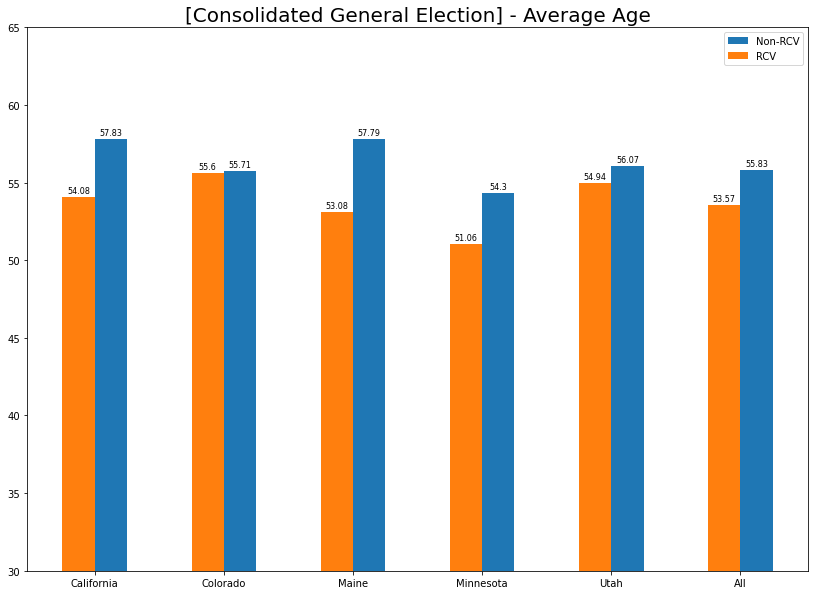

In [115]:
labels = ['California', 'Colorado', 'Maine', 'Minnesota',  'Utah', 'All']

rcv_con_gen = df_rcv[df_rcv['elec_type'] == 'Consolidated_General']['mean_age'].to_list()
rcv_con_gen.append(df_rcv_all['mean_age'][0])
non_rcv_con_gen = df_non_rcv[df_non_rcv['elec_type'] == 'Consolidated_General']['mean_age'].to_list()
non_rcv_con_gen.append(df_non_rcv_all['mean_age'][0])

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize = (14,10))

non_rcv = ax.bar(x + width/2, non_rcv_con_gen, width, label = 'Non-RCV')
rcv = ax.bar(x - width/2, rcv_con_gen, width, label = 'RCV')

ax.bar_label(rcv, padding=2, size=8)
ax.bar_label(non_rcv, padding=2, size=8)

ax.set_title("[Consolidated General Election] - Average Age", size=20)
ax.set_xticks(x, labels)
ax.set_yticks(np.arange(30, 70, 5))
ax.set_ylim([30,65])

ax.legend()

plt.show()

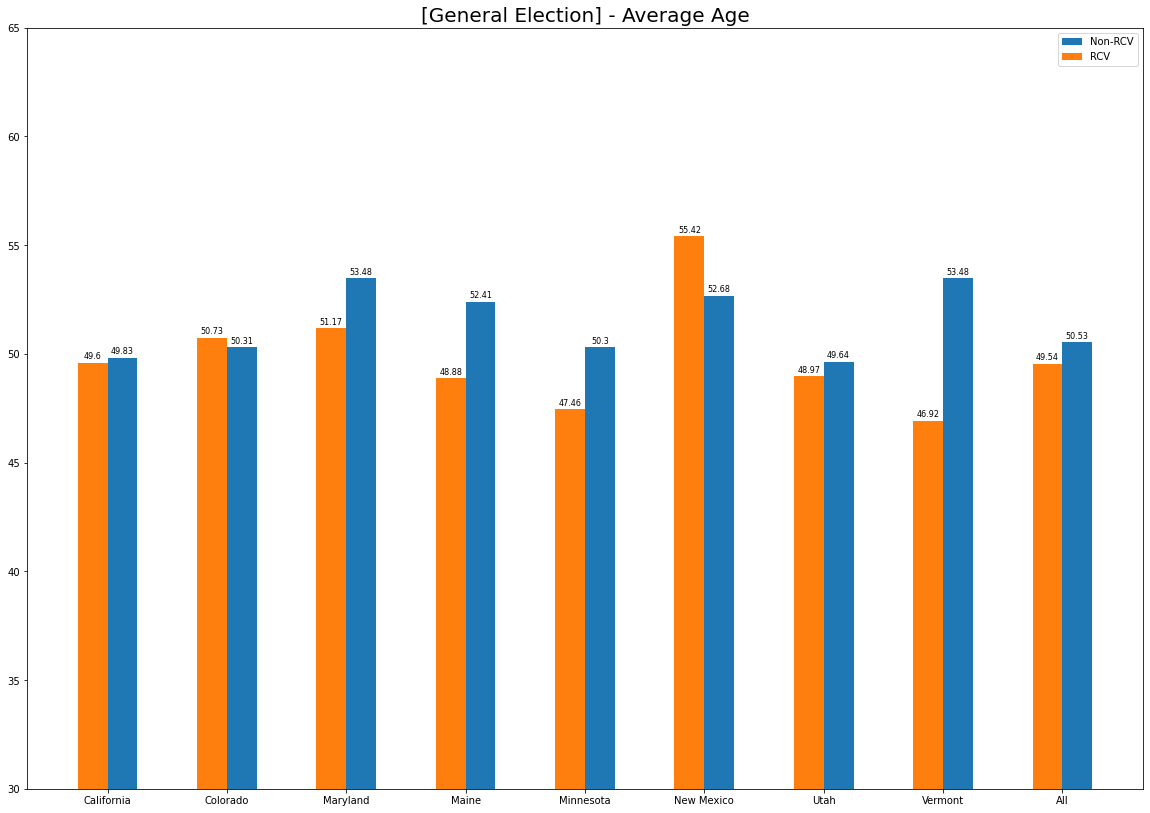

In [117]:
labels = ['California', 'Colorado', 'Maryland', 'Maine', 'Minnesota', 'New Mexico', 'Utah', 'Vermont', 'All']

rcv_gen = df_rcv[df_rcv['elec_type'] == 'General']['mean_age'].to_list()
rcv_gen.append(df_rcv_all['mean_age'][1])
non_rcv_gen = df_non_rcv[df_non_rcv['elec_type'] == 'General']['mean_age'].to_list()
non_rcv_gen.append(df_non_rcv_all['mean_age'][1])

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize = (20,14))

non_rcv = ax.bar(x + width/2, non_rcv_gen, width, label = 'Non-RCV')
rcv = ax.bar(x - width/2, rcv_gen, width, label = 'RCV')

ax.bar_label(rcv, padding=2, size=8)
ax.bar_label(non_rcv, padding=2, size=8)

ax.set_title("[General Election] - Average Age", size=20)
ax.set_xticks(x, labels)
ax.set_yticks(np.arange(30, 70, 5))
ax.set_ylim([30,65])

ax.legend()

plt.show()

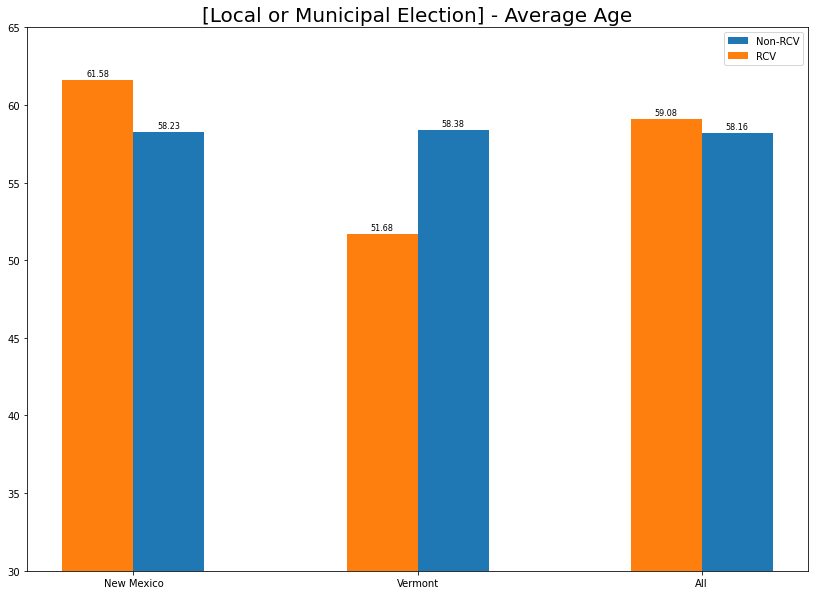

In [153]:
labels = ['New Mexico', 'Vermont', 'All']

rcv_local = df_rcv[df_rcv['elec_type'] == 'Local_or_Municipal']['mean_age'].to_list()
rcv_local.append(df_rcv_all['mean_age'][2])
non_rcv_local = df_non_rcv[df_non_rcv['elec_type'] == 'Local_or_Municipal'].drop(index=[2, 5])
non_rcv_local = non_rcv_local['mean_age'].to_list()
non_rcv_local.append(df_non_rcv_all['mean_age'][2])

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize = (14,10))

non_rcv = ax.bar(x + width/2, non_rcv_local, width, label = 'Non-RCV')
rcv = ax.bar(x - width/2, rcv_local, width, label = 'RCV')

ax.bar_label(rcv, padding=2, size=8)
ax.bar_label(non_rcv, padding=2, size=8)

ax.set_title("[Local or Municipal Election] - Average Age", size=20)
ax.set_xticks(x, labels)
ax.set_yticks(np.arange(30, 70, 5))
ax.set_ylim([30,65])

ax.legend()

plt.show()

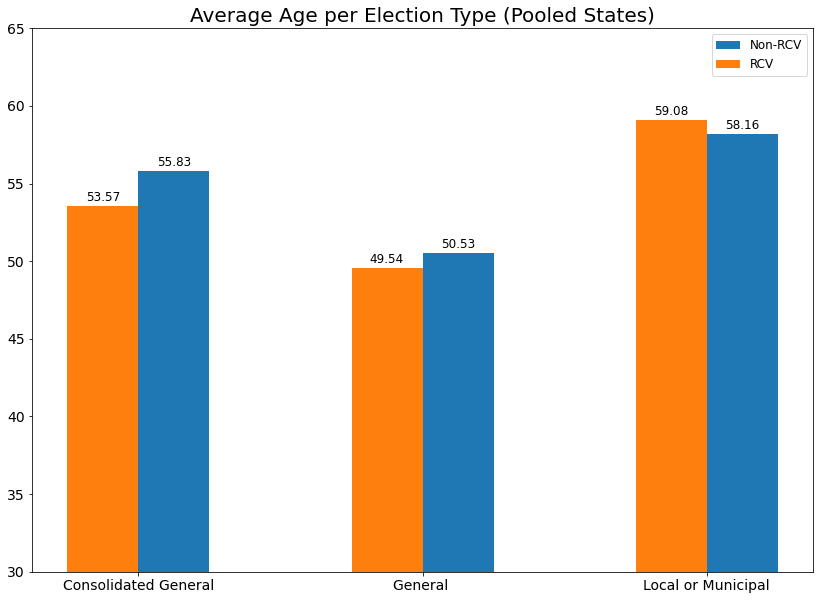

In [162]:
labels = ['Consolidated General', 'General ', 'Local or Municipal']

rcv_all = df_rcv_all['mean_age'].to_list()
non_rcv_all = df_non_rcv_all['mean_age'].to_list()

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize = (14,10))

non_rcv = ax.bar(x + width/2, non_rcv_all, width, label = 'Non-RCV')
rcv = ax.bar(x - width/2, rcv_all, width, label = 'RCV')

ax.bar_label(rcv, padding=2, size=12)
ax.bar_label(non_rcv, padding=2, size=12)

ax.set_title("Average Age per Election Type (Pooled States)", size=20)
ax.set_xticks(x, labels)
ax.set_yticks(np.arange(30, 70, 5))
ax.set_ylim([30,65])
ax.tick_params(axis='both', which='major', labelsize=14)

ax.legend(prop={'size': 12})

plt.show()